# Exploring SAT Test Results From The Demographic Perspective

In this project, we aim to investigate the relationship between SAT scores and various factors (including demographic ones) in New York City public schools. In order to get data on all factors that we would like to investigate, we will use several datasets for this project:

- `'sat_results.csv'` - SAT scores for each high school in New York City
- `'hs_directory.csv'` - A directory of NYC high schools
- `'class_size.csv'` - Information on class size for each school
- `'ap_2010'` - AP test results - Advanced Placement (AP) exam results for each high school (passing an optional AP exam in a particular subject can earn a student college credit in that subject)
- `'graduation.csv'` - The percentage of students who graduated, and other outcome information
- `'demographics.csv'` - Demographic information for each school
- `'all_survey'` and '`d75_survey'` - Surveys of parents, teachers, and students at each school

After we will have cleaned the datasets and merged them into one, we will begin the analysis. These are the topics we will explore:

- Relationship between school safety rate and SAT scores
- School safety rate by district
- Relationship between race and SAT scores
- Relationship between gender and SAT scores
- Relationship between SAT scores and the proportion of AP test takers
- Differences in parent, teacher and student responses to surveys
- Assign scores to schools based on different topics

### Summary of Results

- There is a very weak pattern of schools with higher safety rate having higher SAT scores
- Manhattan schools have the highest safety rate in NYC, while Brooklyn schools seem to be the least safe in the city
- Black and hispanic students tend to do worse on SAT tests compared to white and asian test takers
- Females tend to better on SAT tests than males
- Barely any correlation between SAT scores and the proportion of AP test takers
- To questions like safety and respect score, communication score, engagement score and academic expectations, it is parents who give the highest score, teachers who give the second highest score, and students who give the lowest score
- Schools with highest academic expectations score by parents have SAT scores which are quite average

## Read in the data

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data_files = [
    "ap_2010.csv",
    "class_size.csv",
    "demographics.csv",
    "graduation.csv",
    "hs_directory.csv",
    "sat_results.csv"
]

data = {}

for f in data_files:
    d = pd.read_csv("schools/{0}".format(f))
    data[f.replace(".csv", "")] = d

Now, `data` is a dictionary which keys are name of the datasets (without '.csv'), while the corresponding values are the datasets themselves.

Thus, for example, the `'sat_results.csv'` dataset can be accessed by `data['sat_results']`.

We will now have a look at each of the datasets.

In [2]:
data['sat_results'].head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384


In [3]:
data['hs_directory'].head()

,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,priority08,priority09,priority10,Location 1,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,17K548,Brooklyn School for Music & Theatre,Brooklyn,K440,718-230-6250,718-230-6262,9.0,12,NaN,NaN,...,NaN,NaN,NaN,"883 Classon Avenue\nBrooklyn, NY 11225\n(40.67...",9.0,35.0,213.0,3029686.0,3.011870e+09,Crown Heights South ...
1,09X543,High School for Violin and Dance,Bronx,X400,718-842-0687,718-589-9849,9.0,12,NaN,NaN,...,NaN,NaN,NaN,"1110 Boston Road\nBronx, NY 10456\n(40.8276026...",3.0,16.0,135.0,2004526.0,2.026340e+09,Morrisania-Melrose ...
2,09X327,Comprehensive Model School Project M.S. 327,Bronx,X240,718-294-8111,718-294-8109,6.0,12,NaN,NaN,...,NaN,NaN,NaN,"1501 Jerome Avenue\nBronx, NY 10452\n(40.84241...",4.0,14.0,209.0,2008336.0,2.028590e+09,West Concourse ...
3,02M280,Manhattan Early College School for Advertising,Manhattan,M520,718-935-3477,NaN,9.0,10,9.0,14.0,...,NaN,NaN,NaN,"411 Pearl Street\nNew York, NY 10038\n(40.7106...",1.0,1.0,29.0,1001388.0,1.001130e+09,Chinatown ...
4,28Q680,Queens Gateway to Health Sciences Secondary Sc...,Queens,Q695,718-969-3155,718-969-3552,6.0,12,NaN,NaN,...,NaN,NaN,NaN,"160 20 Goethals Avenue\nJamaica, NY 11432\n(40...",8.0,24.0,1267.0,4539721.0,4.068580e+09,Pomonok-Flushing Heights-Hillcrest ...


In [4]:
data['class_size'].head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN


In [5]:
data['ap_2010'].head()

,DBN,SchoolName,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5
0,01M448,UNIVERSITY NEIGHBORHOOD H.S.,39.0,49.0,10.0
1,01M450,EAST SIDE COMMUNITY HS,19.0,21.0,NaN
2,01M515,LOWER EASTSIDE PREP,24.0,26.0,24.0
3,01M539,"NEW EXPLORATIONS SCI,TECH,MATH",255.0,377.0,191.0
4,02M296,High School of Hospitality Management,NaN,NaN,NaN


In [6]:
data['graduation'].head()

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
0,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2003,5,s,NaN,s,NaN,NaN,...,s,NaN,NaN,s,NaN,NaN,s,NaN,s,NaN
1,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2004,55,37,67.3,17,30.9,45.9,...,17,30.9,45.9,20,36.4,54.1,15,27.3,3,5.5
2,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2005,64,43,67.2,27,42.2,62.8,...,27,42.2,62.8,16,25.0,37.2,9,14.1,9,14.1
3,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78,43,55.1,36,46.2,83.7,...,36,46.2,83.7,7,9.0,16.3,16,20.5,11,14.1
4,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006 Aug,78,44,56.4,37,47.4,84.1,...,37,47.4,84.1,7,9.0,15.9,15,19.2,11,14.1


In [7]:
data['demographics'].head()

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
0,01M015,P.S. 015 ROBERTO CLEMENTE,20052006,89.4,NaN,281,15,36,40,33,...,74,26.3,189,67.3,5,1.8,158.0,56.2,123.0,43.8
1,01M015,P.S. 015 ROBERTO CLEMENTE,20062007,89.4,NaN,243,15,29,39,38,...,68,28.0,153,63.0,4,1.6,140.0,57.6,103.0,42.4
2,01M015,P.S. 015 ROBERTO CLEMENTE,20072008,89.4,NaN,261,18,43,39,36,...,77,29.5,157,60.2,7,2.7,143.0,54.8,118.0,45.2
3,01M015,P.S. 015 ROBERTO CLEMENTE,20082009,89.4,NaN,252,17,37,44,32,...,75,29.8,149,59.1,7,2.8,149.0,59.1,103.0,40.9
4,01M015,P.S. 015 ROBERTO CLEMENTE,20092010,,96.5,208,16,40,28,32,...,67,32.2,118,56.7,6,2.9,124.0,59.6,84.0,40.4


As we can see, each dataset (except the `class_size` one) has a `DBN` column. DBN is a unique identifier of each school, so we might consider merging the datsets on the `DBN` column.

Next, we will read in the surveys.

In [8]:
# Read in the surveys
all_survey = pd.read_csv("schools/survey_all.txt", delimiter="\t", encoding='windows-1252')
d75_survey = pd.read_csv("schools/survey_d75.txt", delimiter="\t", encoding='windows-1252')

# Merge the surveys
survey = pd.concat([all_survey, d75_survey], axis=0, sort = True)

# Change the DBN column name so it would be the same as in other datasets -
# we will need this when we merge all datasets into one
survey["DBN"] = survey["dbn"]

# Select only those survey fields that we need for our analysis
survey_fields = [
    "DBN", 
    "rr_s", 
    "rr_t", 
    "rr_p", 
    "N_s", 
    "N_t", 
    "N_p", 
    "saf_p_11", 
    "com_p_11", 
    "eng_p_11", 
    "aca_p_11", 
    "saf_t_11", 
    "com_t_11", 
    "eng_t_11", 
    "aca_t_11", 
    "saf_s_11", 
    "com_s_11", 
    "eng_s_11", 
    "aca_s_11", 
    "saf_tot_11", 
    "com_tot_11", 
    "eng_tot_11", 
    "aca_tot_11",
]

# Drop all unnecessary survey fields
survey = survey.loc[:,survey_fields]
data["survey"] = survey

data['survey'].head()

,DBN,rr_s,rr_t,rr_p,N_s,N_t,N_p,saf_p_11,com_p_11,eng_p_11,...,eng_t_11,aca_t_11,saf_s_11,com_s_11,eng_s_11,aca_s_11,saf_tot_11,com_tot_11,eng_tot_11,aca_tot_11
0,01M015,NaN,88,60,NaN,22.0,90.0,8.5,7.6,7.5,...,7.6,7.9,NaN,NaN,NaN,NaN,8.0,7.7,7.5,7.9
1,01M019,NaN,100,60,NaN,34.0,161.0,8.4,7.6,7.6,...,8.9,9.1,NaN,NaN,NaN,NaN,8.5,8.1,8.2,8.4
2,01M020,NaN,88,73,NaN,42.0,367.0,8.9,8.3,8.3,...,6.8,7.5,NaN,NaN,NaN,NaN,8.2,7.3,7.5,8.0
3,01M034,89.0,73,50,145.0,29.0,151.0,8.8,8.2,8.0,...,6.8,7.8,6.2,5.9,6.5,7.4,7.3,6.7,7.1,7.9
4,01M063,NaN,100,60,NaN,23.0,90.0,8.7,7.9,8.1,...,7.8,8.1,NaN,NaN,NaN,NaN,8.5,7.6,7.9,8.0


## Add DBN columns

If we want to merge the datasets on the `'DBN'` column, we need to make sure that other datasets also have it.

From looking at the data, we can tell that the DBN is just a combination of the `'CSD'` and `'SCHOOL CODE'` columns in the `'class_size'` data. The main difference is that the DBN is padded, so that the CSD portion of it always consists of two digits. That means we'll need to add a leading 0 to the CSD if the CSD is less than two digits long. Also, we need to change the column name in the `'hs_directory'` dataset.

Overall, to make sure that there is a `'DBN'` column in each dataset, we need to:
- Create one in the `'class_size'` dataset using the `'CSD'` and `'SCHOOL CODE'` columns
- Change the column name from 'dbn' to 'DBN' in `'hs_directory'` dataset

In [9]:
# Change the column name in 'hs_directory' dataset
data["hs_directory"]["DBN"] = data["hs_directory"]["dbn"]

#Construct a function that adds a '0' to the CSD value if it is less than two digits long
def pad_csd(num):
    string_representation = str(num)
    if len(string_representation) > 1:
        return string_representation
    else:
        return "0" + string_representation

# Apply the function and create the 'DBN' column    
data["class_size"]["padded_csd"] = data["class_size"]["CSD"].apply(pad_csd)
data["class_size"]["DBN"] = data["class_size"]["padded_csd"] + data["class_size"]["SCHOOL CODE"]

data['class_size'].head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,padded_csd,DBN
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN,01,01M015
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN,01,01M015
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01,01M015
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01,01M015
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN,01,01M015


## Convert columns to numeric

Next, we will convert some columns to numeric and create some new useful columns to make our analysis easier:

- Convert each SAT Score column to numeric
- Find average total SAT score by summing up scores of each of three subjects
- Create separate columns for latitude and longitude

In [10]:
# Convert each SAT Score column to numeric
cols = ['SAT Math Avg. Score', 'SAT Critical Reading Avg. Score', 'SAT Writing Avg. Score']
for c in cols:
    data["sat_results"][c] = pd.to_numeric(data["sat_results"][c], errors="coerce")

# Create a total SAT Score column    
data['sat_results']['sat_score'] = data['sat_results'][cols[0]] + data['sat_results'][cols[1]] + data['sat_results'][cols[2]]

data['sat_results'].head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0
3,01M458,FORSYTH SATELLITE ACADEMY,7,414.0,401.0,359.0,1174.0
4,01M509,MARTA VALLE HIGH SCHOOL,44,390.0,433.0,384.0,1207.0


Next, we will extract latitude and longitude values from the `'Location 1'` column of `'hs_directory'` dataset. First, we will have a look at the data.

In [11]:
data['hs_directory']['Location 1'].head()

0    883 Classon Avenue\nBrooklyn, NY 11225\n(40.67...
1    1110 Boston Road\nBronx, NY 10456\n(40.8276026...
2    1501 Jerome Avenue\nBronx, NY 10452\n(40.84241...
3    411 Pearl Street\nNew York, NY 10038\n(40.7106...
4    160 20 Goethals Avenue\nJamaica, NY 11432\n(40...
Name: Location 1, dtype: object

As we can see, school coordinates are at the end of the expression in the parentheses. We will extract the data from the parentheses and split it to get latitude and longitude separately (inside the parentheses, the values are separated by comma).

In [12]:
# Create a function that extracts the latitude
def find_lat(loc):
    coords = re.findall("\(.+, .+\)", loc)
    lat = coords[0].split(",")[0].replace("(", "")
    return lat

# Create a function that extracts the longitude
def find_lon(loc):
    coords = re.findall("\(.+, .+\)", loc)
    lon = coords[0].split(",")[1].replace(")", "").strip()
    return lon

# Apply the function and create columns for each latitude and longitude
data["hs_directory"]["lat"] = data["hs_directory"]["Location 1"].apply(find_lat)
data["hs_directory"]["lon"] = data["hs_directory"]["Location 1"].apply(find_lon)

# Convert latitude and longitude data to numeric
data["hs_directory"]["lat"] = pd.to_numeric(data["hs_directory"]["lat"], errors="coerce")
data["hs_directory"]["lon"] = pd.to_numeric(data["hs_directory"]["lon"], errors="coerce")

data["hs_directory"][['lon', 'lat']].head()

,lon,lat
0,-73.961648,40.670299
1,-73.904475,40.827603
2,-73.916162,40.842414
3,-74.000807,40.710679
4,-73.806500,40.718810


## Condense datasets

Next, we need to make sure that there is one row for each school so that each DBN is unique. 

In [13]:
data['class_size'].head() 

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,padded_csd,DBN
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN,01,01M015
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN,01,01M015
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01,01M015
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01,01M015
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN,01,01M015


As we can see, several rows represent a single school. However, these rows have different values for `'GRADE'` and `'PROGRAM TYPE'` columns. Next, let us look at the unique values in each column.

In [14]:
data['class_size']['GRADE '].unique()

array(['0K', '01', '02', '03', '04', '05', '0K-09', nan, '06', '07', '08',
       'MS Core', '09-12', '09'], dtype=object)

In [15]:
data['class_size']['PROGRAM TYPE'].unique()

array(['GEN ED', 'CTT', 'SPEC ED', nan, 'G&T'], dtype=object)

In [16]:
data['class_size']['PROGRAM TYPE'].value_counts()

GEN ED     14545
CTT         7460
SPEC ED     3653
G&T          469
Name: PROGRAM TYPE, dtype: int64

Since we are interested in high schools, we will select rows with grade `'09-12'`.

We also have to choose only one type of program to make each DBN unique. It does not really matter which one, so we will choose the most frequent one, `'GEN ED'`.

In [17]:
# Select rows with chosen grade and program type
class_size = data["class_size"]
class_size = class_size[class_size["GRADE "] == "09-12"]
class_size = class_size[class_size["PROGRAM TYPE"] == "GEN ED"]

class_size.head(15)

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,padded_csd,DBN
225,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 9,-,63.0,3.0,21.0,19.0,25.0,STARS,NaN,01,01M292
226,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 10,-,79.0,3.0,26.3,24.0,31.0,STARS,NaN,01,01M292
227,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 11,-,38.0,2.0,19.0,16.0,22.0,STARS,NaN,01,01M292
228,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 12,-,69.0,3.0,23.0,13.0,30.0,STARS,NaN,01,01M292
229,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,MATH,Integrated Algebra,-,53.0,3.0,17.7,16.0,21.0,STARS,NaN,01,01M292
231,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,MATH,Geometry,-,32.0,1.0,32.0,32.0,32.0,STARS,NaN,01,01M292
232,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,MATH,Other Math,-,118.0,6.0,19.7,13.0,27.0,STARS,NaN,01,01M292
233,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,SCIENCE,Earth Science,-,125.0,4.0,31.3,28.0,35.0,STARS,NaN,01,01M292
234,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,SCIENCE,Living Environment,-,58.0,2.0,29.0,29.0,29.0,STARS,NaN,01,01M292
235,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,SCIENCE,Chemistry,-,157.0,8.0,19.6,13.0,24.0,STARS,NaN,01,01M292


There are still several rows for each school. This is because of different subjects in the `'CORE SUBJECT (MS CORE and 9-12 ONLY)'` and `'CORE COURSE (MS CORE and 9-12 ONLY)'`. To use as much data as we can, we will find the mean of class sizes for each school (and all other numeric columns).

In [18]:
class_size = class_size.groupby("DBN").agg(np.mean)
class_size.reset_index(inplace=True)   # To move 'DBN' from index to column
data["class_size"] = class_size

data['class_size'].head()

,DBN,CSD,NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,SCHOOLWIDE PUPIL-TEACHER RATIO
0,01M292,1,88.0000,4.000000,22.564286,18.50,26.571429,NaN
1,01M332,1,46.0000,2.000000,22.000000,21.00,23.500000,NaN
2,01M378,1,33.0000,1.000000,33.000000,33.00,33.000000,NaN
3,01M448,1,105.6875,4.750000,22.231250,18.25,27.062500,NaN
4,01M450,1,57.6000,2.733333,21.200000,19.40,22.866667,NaN


Now each row represents one school in the `'class_size'` dataset.

We are moving on to the `'demographics'` dataset.

In [19]:
data['demographics'].head(10)

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
0,01M015,P.S. 015 ROBERTO CLEMENTE,20052006,89.4,NaN,281,15,36,40,33,...,74,26.3,189,67.3,5,1.8,158.0,56.2,123.0,43.8
1,01M015,P.S. 015 ROBERTO CLEMENTE,20062007,89.4,NaN,243,15,29,39,38,...,68,28.0,153,63.0,4,1.6,140.0,57.6,103.0,42.4
2,01M015,P.S. 015 ROBERTO CLEMENTE,20072008,89.4,NaN,261,18,43,39,36,...,77,29.5,157,60.2,7,2.7,143.0,54.8,118.0,45.2
3,01M015,P.S. 015 ROBERTO CLEMENTE,20082009,89.4,NaN,252,17,37,44,32,...,75,29.8,149,59.1,7,2.8,149.0,59.1,103.0,40.9
4,01M015,P.S. 015 ROBERTO CLEMENTE,20092010,,96.5,208,16,40,28,32,...,67,32.2,118,56.7,6,2.9,124.0,59.6,84.0,40.4
5,01M015,P.S. 015 ROBERTO CLEMENTE,20102011,,96.5,203,13,37,35,33,...,75,36.9,110,54.2,4,2.0,113.0,55.7,90.0,44.3
6,01M015,P.S. 015 ROBERTO CLEMENTE,20112012,NaN,89.4,189,13,31,35,28,...,63,33.3,109,57.7,4,2.1,97.0,51.3,92.0,48.7
7,01M019,P.S. 019 ASHER LEVY,20052006,61.5,NaN,402,15,43,55,53,...,103,25.6,207,51.5,39,9.7,214.0,53.2,188.0,46.8
8,01M019,P.S. 019 ASHER LEVY,20062007,61.5,NaN,312,13,37,45,52,...,70,22.4,172,55.1,19,6.1,157.0,50.3,155.0,49.7
9,01M019,P.S. 019 ASHER LEVY,20072008,61.5,NaN,338,28,48,46,47,...,72,21.3,186,55.0,22,6.5,162.0,47.9,176.0,52.1


As we can see, `'schoolyear'` column is the only thing that prevents DBN from being unique. We will choose the 2011-2012 school year, since it will give us the most recent data and will match the year of SAT results.

In [20]:
data["demographics"] = data["demographics"][data["demographics"]["schoolyear"] == 20112012]
data['demographics'].head()

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
6,01M015,P.S. 015 ROBERTO CLEMENTE,20112012,NaN,89.4,189,13,31,35,28,...,63,33.3,109,57.7,4,2.1,97.0,51.3,92.0,48.7
13,01M019,P.S. 019 ASHER LEVY,20112012,NaN,61.5,328,32,46,52,54,...,81,24.7,158,48.2,28,8.5,147.0,44.8,181.0,55.2
20,01M020,PS 020 ANNA SILVER,20112012,NaN,92.5,626,52,102,121,87,...,55,8.8,357,57.0,16,2.6,330.0,52.7,296.0,47.3
27,01M034,PS 034 FRANKLIN D ROOSEVELT,20112012,NaN,99.7,401,14,34,38,36,...,90,22.4,275,68.6,8,2.0,204.0,50.9,197.0,49.1
35,01M063,PS 063 WILLIAM MCKINLEY,20112012,NaN,78.9,176,18,20,30,21,...,41,23.3,110,62.5,15,8.5,97.0,55.1,79.0,44.9


`'graduation'` dataset is the next one to be checked.

In [21]:
data['graduation'].head(10)

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
0,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2003,5,s,NaN,s,NaN,NaN,...,s,NaN,NaN,s,NaN,NaN,s,NaN,s,NaN
1,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2004,55,37,67.3,17,30.9,45.9,...,17,30.9,45.9,20,36.4,54.1,15,27.3,3,5.5
2,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2005,64,43,67.2,27,42.2,62.8,...,27,42.2,62.8,16,25.0,37.2,9,14.1,9,14.1
3,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78,43,55.1,36,46.2,83.7,...,36,46.2,83.7,7,9.0,16.3,16,20.5,11,14.1
4,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006 Aug,78,44,56.4,37,47.4,84.1,...,37,47.4,84.1,7,9.0,15.9,15,19.2,11,14.1
5,Total Cohort,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,2001,64,46,71.9,32,50.0,69.6,...,25,39.1,54.3,14,21.9,30.4,10,15.6,6,9.4
6,Total Cohort,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,2002,52,33,63.5,19,36.5,57.6,...,11,21.2,33.3,14,26.9,42.4,16,30.8,1,1.9
7,Total Cohort,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,2003,87,67,77.0,39,44.8,58.2,...,28,32.2,41.8,28,32.2,41.8,9,10.3,11,12.6
8,Total Cohort,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,2004,112,75,67.0,36,32.1,48.0,...,30,26.8,40.0,39,34.8,52.0,33,29.5,4,3.6
9,Total Cohort,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,2005,121,64,52.9,35,28.9,54.7,...,31,25.6,48.4,29,24.0,45.3,41,33.9,11,9.1


The `Cohort` column represents the year, so we should choose the most recent one, 2006.

The `Demographic` column appears to refer to a specific demographic group. We also want data from the full cohort, so we'll only pick rows where `Demographic` is `Total Cohort`.

In [22]:
data["graduation"] = data["graduation"][data["graduation"]["Cohort"] == "2006"]
data["graduation"] = data["graduation"][data["graduation"]["Demographic"] == "Total Cohort"]

data['graduation'].head(10)

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
3,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78,43,55.1,36,46.2,83.7,...,36,46.2,83.7,7,9.0,16.3,16,20.5,11,14.1
10,Total Cohort,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,2006,124,53,42.7,42,33.9,79.2,...,34,27.4,64.2,11,8.9,20.8,46,37.1,20,16.1
17,Total Cohort,01M450,EAST SIDE COMMUNITY SCHOOL,2006,90,70,77.8,67,74.4,95.7,...,67,74.4,95.7,3,3.3,4.3,15,16.7,5,5.6
24,Total Cohort,01M509,MARTA VALLE HIGH SCHOOL,2006,84,47,56.0,40,47.6,85.1,...,23,27.4,48.9,7,8.3,14.9,25,29.8,5,6.0
31,Total Cohort,01M515,LOWER EAST SIDE PREPARATORY HIGH SCHO,2006,193,105,54.4,91,47.2,86.7,...,22,11.4,21.0,14,7.3,13.3,53,27.5,35,18.1
38,Total Cohort,01M539,NEW EXPLORATIONS INTO SCIENCE TECHNO,2006,46,46,100.0,46,100.0,100.0,...,15,32.6,32.6,0,0.0,0.0,0,0.0,0,0.0
45,Total Cohort,01M650,CASCADES HIGH SCHOOL,2006,89,49,55.1,36,40.4,73.5,...,36,40.4,73.5,13,14.6,26.5,34,38.2,6,6.7
52,Total Cohort,01M696,BARD HIGH SCHOOL EARLY COLLEGE,2006,139,134,96.4,134,96.4,100.0,...,134,96.4,100.0,0,0.0,0.0,4,2.9,1,0.7
59,Total Cohort,02M047,47 THE AMERICAN SIGN LANGUAGE AND ENG,2006,25,19,76.0,8,32.0,42.1,...,8,32.0,42.1,11,44.0,57.9,4,16.0,1,4.0
66,Total Cohort,02M288,FOOD AND FINANCE HIGH SCHOOL,2006,102,91,89.2,77,75.5,84.6,...,77,75.5,84.6,14,13.7,15.4,5,4.9,3,2.9


## Convert AP scores to numeric

Next, we will convert columns related to AP exams to numeric, so that we could analyze them.

In [23]:
# Select the necessary columns
cols = ['AP Test Takers ', 'Total Exams Taken', 'Number of Exams with scores 3 4 or 5']

# Convert them to a numeric dtype
for col in cols:
    data["ap_2010"][col] = pd.to_numeric(data["ap_2010"][col], errors="coerce")

## Combine the datasets

Next, we will finally combine the datasets. Our analysis is mostly concerned with SAT results, so we do not want any rows with missing SAT scores. That is why we establish `sat_results` as a main dataset, and we will merge all other datasets to it. `ap_2010` and `graduation` datasets are merged using a 'left' join because information in them is not as valuable for our analysis as data in other datasets. These would be merged using an 'inner join'.

In [24]:
combined = data["sat_results"]

combined = combined.merge(data["ap_2010"], on="DBN", how="left")
combined = combined.merge(data["graduation"], on="DBN", how="left")

to_merge = ["class_size", "demographics", "survey", "hs_directory"]

for m in to_merge:
    combined = combined.merge(data[m], on="DBN", how="inner")
    
combined.head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,...,priority10,Location 1,Community Board,Council District,Census Tract,BIN,BBL,NTA,lat,lon
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0,NaN,NaN,NaN,...,NaN,"220 Henry Street\nNew York, NY 10002\n(40.7137...",3.0,1.0,201.0,1003223.0,1.002690e+09,Lower East Side ...,40.713764,-73.985260
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0,UNIVERSITY NEIGHBORHOOD H.S.,39.0,49.0,...,NaN,"200 Monroe Street\nNew York, NY 10002\n(40.712...",3.0,1.0,202.0,1003214.0,1.002590e+09,Lower East Side ...,40.712332,-73.984797
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0,EAST SIDE COMMUNITY HS,19.0,21.0,...,NaN,"420 East 12 Street\nNew York, NY 10009\n(40.72...",3.0,2.0,34.0,1005974.0,1.004390e+09,East Village ...,40.729783,-73.983041
3,01M509,MARTA VALLE HIGH SCHOOL,44,390.0,433.0,384.0,1207.0,NaN,NaN,NaN,...,NaN,"145 Stanton Street\nNew York, NY 10002\n(40.72...",3.0,1.0,3001.0,1004323.0,1.003540e+09,Chinatown ...,40.720569,-73.985673
4,01M539,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...",159,522.0,574.0,525.0,1621.0,"NEW EXPLORATIONS SCI,TECH,MATH",255.0,377.0,...,NaN,"111 Columbia Street\nNew York, NY 10002\n(40.7...",3.0,2.0,2201.0,1004070.0,1.003350e+09,Lower East Side ...,40.718725,-73.979426


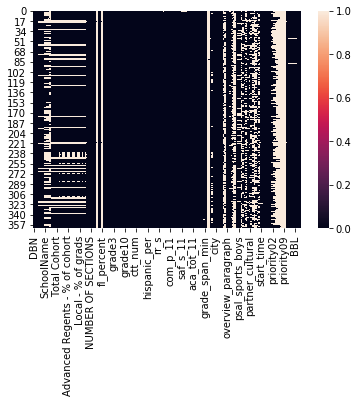

In [25]:
sns.heatmap(combined.isnull())

To be able to find correlations between the columns, we need to get rid of all NaN values. We will fill all NaN values with the mean of the corresponding column. In case all values in the column are NaN, and there is no mean, we will fill such columns with 0.

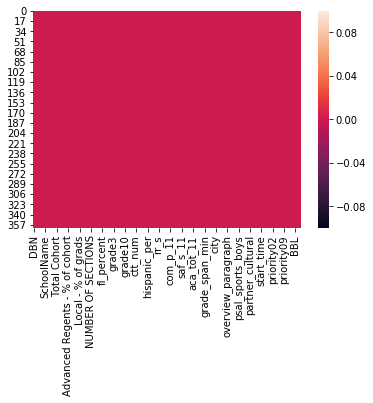

In [26]:
combined = combined.fillna(combined.mean())
combined = combined.fillna(0)

sns.heatmap(combined.isnull())

## Add a school district column for mapping

Grouping our data based on school district could be an interesting approach to take. In order to make it possible, we should get the school district of each school as a separate column.

In [27]:
# Create a function that gets a school district out of a BN value
def get_first_two_chars(dbn):
    return dbn[0:2]

# Create the school district column
combined["school_dist"] = combined["DBN"].apply(get_first_two_chars)

combined["school_dist"].head()

0    01
1    01
2    01
3    01
4    01
Name: school_dist, dtype: object

## Find correlations

Now we can begin our analysis. Let us start with looking at which columns correlate with SAT scores.

In [28]:
correlations = combined.corr()
correlations = correlations["sat_score"]
print(correlations)

SAT Critical Reading Avg. Score         0.986820
SAT Math Avg. Score                     0.972643
SAT Writing Avg. Score                  0.987771
sat_score                               1.000000
AP Test Takers                          0.523140
Total Exams Taken                       0.514333
Number of Exams with scores 3 4 or 5    0.463245
Total Cohort                            0.325144
Total Grads - % of cohort               0.584234
Total Regents - % of cohort             0.667603
Total Regents - % of grads              0.494732
Advanced Regents - % of cohort          0.771566
Advanced Regents - % of grads           0.739927
Regents w/o Advanced - % of cohort     -0.138188
Regents w/o Advanced - % of grads      -0.456213
Local - % of cohort                    -0.467951
Local - % of grads                     -0.494732
Still Enrolled - % of cohort           -0.491914
Dropped Out - % of cohort              -0.458537
CSD                                     0.042948
NUMBER OF STUDENTS /

There are several correlations that might be considered interesting:
- `total_enrollment` has a strong positive correlation with `sat_score`. This is surprising because we'd expect smaller schools where students receive more attention to have higher scores. However, it looks like the opposite is true -- larger schools tend to do better on the SAT.
- Other columns that are proxies for enrollment correlate similarly. These include `total_students`, `N_s`, `N_p`, `N_t`, `AP Test Takers`, `Total Exams Taken`, and `NUMBER OF SECTIONS`.
- Both the percentage of females (`female_per`) and number of females (`female_num`) at a school correlate positively with SAT score, whereas the percentage of males (`male_per`) and the number of males (`male_num`) correlate negatively. This could indicate that women do better on the SAT than men.
- Teacher and student ratings of school safety (`saf_t_11`, and `saf_s_11`) correlate with sat_score.
- Student ratings of school academic standards (`aca_s_11`) correlate with sat_score, but this does not hold for ratings from teachers and parents (`aca_p_11` and `aca_t_11`).
- There is significant racial inequality in SAT scores (`white_per`, `asian_per`, `black_per`, `hispanic_per`).
- The percentage of English language learners at the school (`ell_percent`, `frl_percent`) has a strong negative correlation with SAT scores.

## Plotting survey correlations
Next, we will have a look at correlations of SAT scores with results of the survey in particular.

In [29]:
# Remove DBN since it's a unique identifier, not a useful numerical value for correlation.
survey_fields.remove("DBN")

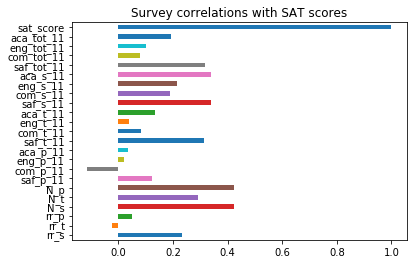

In [30]:
# Add 'sat_score' to survey_fields to include it into the correlation plot
survey_fields.append('sat_score')

# Find correlations
corr_survey = combined[survey_fields].corr()
corr_survey['sat_score'].plot(kind = 'barh', title = 'Survey correlations with SAT scores')

There are some surprising correlations we can see in the graph. Both total number of parent and total number of student responses to the survey columns correlate with average SAT score of the school with the rate of ~0.42.

Other columns that have a high correlation rate to SAT scores are related to 'safety and respect' of the school. This is not surprising - it is easier to learn in safe and respectful environment. Next, we will investigate this relationship a bit further.

## Explore safety rate and SAT scores relationship

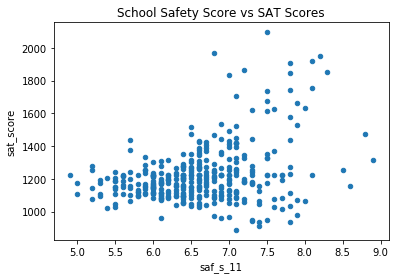

In [31]:
combined.plot('saf_s_11', 'sat_score', 'scatter', title = 'School Safety Score vs SAT Scores')

The majority of schools seem to have similar SAT scores regardless of how students perceive its safety, while there are several outliers with both high SAT score and high safety score.

Therefore, there is some weak pattern of schools with higher safety rate having higher SAT scores.

## Safety rate by school district

Next, we would like to see the geographic context of school safety rate. In order to do this, we will build a map of NYC that shows safety rate of each school district.

In [32]:
# Build a table of safety rate by school district

safety_by_district = combined.pivot_table(index = 'school_dist', values = 'saf_s_11')
safety_by_district

,saf_s_11
school_dist,
01,6.768611
02,6.910660
03,6.716667
04,6.885714
05,6.314286
06,6.950000
07,6.800000
08,6.364697
09,6.655000


In [33]:
# Find mean latitude and mean longtitude of schools in each district

for dist in combined['school_dist'].unique():
    dist_rows = combined.loc[combined['school_dist'] == dist, :]
    mean_lat = dist_rows['lat'].mean()
    mean_lon = dist_rows['lon'].mean()
    safety_by_district.loc[dist, 'lat'] = mean_lat # Add mean latitude and mean 
    safety_by_district.loc[dist, 'lon'] = mean_lon # longtitude to the dataset

safety_by_district

,saf_s_11,lat,lon
school_dist,,,
01,6.768611,40.719022,-73.982377
02,6.910660,40.739699,-73.991386
03,6.716667,40.781574,-73.977370
04,6.885714,40.793449,-73.943215
05,6.314286,40.817077,-73.949251
06,6.950000,40.848970,-73.932502
07,6.800000,40.816815,-73.919971
08,6.364697,40.823803,-73.866087
09,6.655000,40.836349,-73.906240


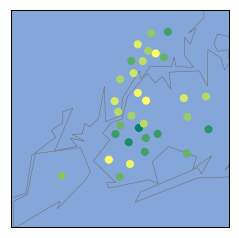

In [34]:
# Build a map that shows school safety rate for each district

from mpl_toolkits.basemap import Basemap

m = Basemap(
    projection='merc', 
    llcrnrlat=40.496044, 
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    resolution='i'
)

m.drawmapboundary(fill_color='#85A6D9')
m.drawcoastlines(color='#6D5F47', linewidth=.4)
m.drawrivers(color='#6D5F47', linewidth=.4)

longitudes = safety_by_district['lon'].tolist()
latitudes = safety_by_district['lat'].tolist()

m.scatter(longitudes, latitudes, s = 50, zorder = 2, latlon = True, c = safety_by_district['saf_s_11'], cmap = 'summer')
plt.show()

We can clearly see that safety rate is lower in Brooklyn, especially in its northern part. This borough has the lowest safety rate compared to others.

Staten Island which has only one school district also has a lower safety rate compared to other boroughs. It is slightly higher or is about the same level as Brooklyn.

Queens and Bronx have various school districts with both high and low safety rates, so they are in the middle between Brooklyn & Staten Island and Manhattan on safety rate.

Manhattan seems to have the highest safety rate among the boroughs.

## Relationship between race and SAT scores

In [35]:
# Find correlation rates between SAT score and 
# percentage of students of each race

race_cols = combined[['white_per', 'asian_per', 'black_per', 'hispanic_per', 'sat_score']]
race_cols_corr_sat = race_cols.corr()['sat_score']
race_cols_corr_sat.drop('sat_score', inplace = True) # to drop correlation of 
race_cols_corr_sat                                   # SAT score with itself

white_per       0.620718
asian_per       0.570730
black_per      -0.284139
hispanic_per   -0.396985
Name: sat_score, dtype: float64

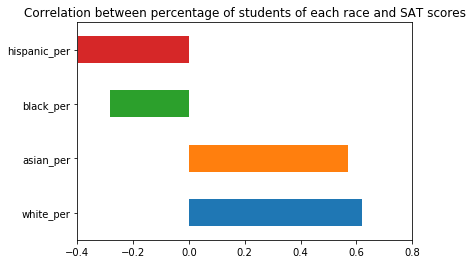

In [36]:
race_cols_corr_sat.plot(kind = 'barh', xlim = (-0.4, 0.8), title = 'Correlation between percentage of students of each race and SAT scores')

We can see that there is a strong positive correlation between percentage of asian/white students and SAT scores.

However, the opposite happens for black and hispanic students. The negative correlation between percentage of hispanic students and SAT scores looks quite unexpected, so we will explore this relationship in more depth.

Also, it is quite interesting why percentage of asian students have a strong positive correlation with SAT scores, while proportion of other students of color (black and hispanic) correlates negatively with exam scores.

## Relationship between percentage of hispanic students and SAT scores

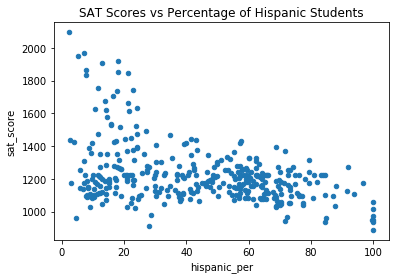

In [37]:
# Build a scatter plot of SAT scores and percentage of hispanic students

combined.plot('hispanic_per', 'sat_score', kind = 'scatter', title = 'SAT Scores vs Percentage of Hispanic Students')

A pattern of negative correlation between SAT scores and proportion of hispanic students is visible from the scatter plot. 

It is quite interesting that there is a **category of schools with percentage of hispanic students close to 100**, and the average SAT score of these schools is quite low compared to other schools.

There is **another category of schools with very high SAT scores and very low percentage of hispanic students**. However, schools that have low percentage of hispanic students do not necessarily have high SAT scores.

We will research these **two categories** of schools in more depth.

## Schools with high percentage of hispanic students

In [38]:
# Select schools with very high percentage of hispanic students

high_hispanic = combined.loc[combined['hispanic_per'] > 95, :]
high_hispanic

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,...,Location 1,Community Board,Council District,Census Tract,BIN,BBL,NTA,lat,lon,school_dist
44,02M542,MANHATTAN BRIDGES HIGH SCHOOL,66,336.0,378.0,344.0,1058.0,Manhattan Bridges High School,67.000000,102.000000,...,"525 West 50Th Street\nNew York, NY 10019\n(40....",4.000000,3.000000,135.000000,1.083802e+06,1.010790e+09,Clinton ...,40.765027,-73.992517,02
82,06M348,WASHINGTON HEIGHTS EXPEDITIONARY LEARNING SCHOOL,70,380.0,395.0,399.0,1174.0,0,129.028846,197.038462,...,"511 West 182Nd Street\nNew York, NY 10033\n(40...",12.000000,10.000000,269.000000,1.063703e+06,1.021550e+09,Washington Heights North ...,40.848879,-73.930807,06
89,06M552,GREGORIO LUPERON HIGH SCHOOL FOR SCIENCE AND M...,56,339.0,349.0,326.0,1014.0,GREGORIO LUPERON HS SCI & MATH,88.000000,138.000000,...,"501 West 165Th\nNew York, NY 10032\n(40.838032...",6.792244,22.238227,3760.027701,2.587480e+06,2.515083e+09,0,40.838032,-73.938371,06
125,09X365,ACADEMY FOR LANGUAGE AND TECHNOLOGY,54,315.0,339.0,297.0,951.0,Academy for Language and Technology,20.000000,20.000000,...,"1700 Macombs Road\nBronx, NY 10453\n(40.849102...",5.000000,14.000000,21502.000000,2.008460e+06,2.028660e+09,University Heights-Morris Heights ...,40.849102,-73.916088,09
141,10X342,INTERNATIONAL SCHOOL FOR LIBERAL ARTS,49,300.0,333.0,301.0,934.0,International School for Liberal Arts,55.000000,73.000000,...,"2780 Reservoir Avenue\nBronx, NY 10468\n(40.87...",7.000000,11.000000,409.000000,2.015241e+06,2.032470e+09,Van Cortlandt Village ...,40.870377,-73.898163,10
176,12X388,PAN AMERICAN INTERNATIONAL HIGH SCHOOL AT MONROE,30,321.0,351.0,298.0,970.0,0,129.028846,197.038462,...,"1300 Boynton Avenue\nBronx, NY 10472\n(40.8313...",9.000000,18.000000,56.000000,2.027459e+06,2.038640e+09,West Farms-Bronx River ...,40.831366,-73.878823,12
253,19K583,MULTICULTURAL HIGH SCHOOL,29,279.0,322.0,286.0,887.0,Multicultural High School,44.000000,44.000000,...,"999 Jamaica Avenue\nBrooklyn, NY 11208\n(40.69...",5.000000,37.000000,1180.000000,3.090738e+06,3.040940e+09,park-cemetery-etc-Brooklyn ...,40.691144,-73.868426,19
286,24Q296,PAN AMERICAN INTERNATIONAL HIGH SCHOOL,55,317.0,323.0,311.0,951.0,0,129.028846,197.038462,...,"45 10 94Th Street\nElmhurst, NY 11373\n(40.743...",4.000000,25.000000,463.000000,4.437166e+06,4.016000e+09,Elmhurst ...,40.743303,-73.870575,24


There are 8 schools in NYC with more than 95 percent of hispanic students. 

4 of these schools are multicultural/international/pan american schools.

The main focus of 4 other schools is on economically disadvantaged students (students from families with low income). These schools are also targeted at FRL students (reduced-price lunch) and/or STH (students in temporary housing) and/or ethnic minorities students. Some of these schools are dual language schools (English and Spanish).

Overall, most of these schools focus on economically disadvantaged students or international students.

## Schools with low percentage of hispanic students

In [39]:
# Select schools with very low percentage of hispanic students and high SAT scores

low_hispanic = combined.loc[combined['hispanic_per'] < 10, :]
low_hispanic = low_hispanic.loc[low_hispanic['sat_score'] > 1800, :]
low_hispanic

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,...,Location 1,Community Board,Council District,Census Tract,BIN,BBL,NTA,lat,lon,school_dist
37,02M475,STUYVESANT HIGH SCHOOL,832,679.0,735.0,682.0,2096.0,STUYVESANT HS,1510.0,2819.0,...,"345 Chambers Street\nNew York, NY 10282\n(40.7...",1.0,1.0,31703.0,1084587.0,1.000160e+09,Battery Park City-Lower Manhattan ...,40.717746,-74.014049,02
151,10X445,BRONX HIGH SCHOOL OF SCIENCE,731,632.0,688.0,649.0,1969.0,BRONX HS OF SCIENCE,1190.0,2435.0,...,"75 West 205 Street\nBronx, NY 10468\n(40.87705...",7.0,11.0,409.0,2094706.0,2.032510e+09,Van Cortlandt Village ...,40.877056,-73.889780,10
187,13K430,BROOKLYN TECHNICAL HIGH SCHOOL,1277,587.0,659.0,587.0,1833.0,BROOKLYN TECHNICAL HS,2117.0,3692.0,...,"29 Ft Greene Place\nBrooklyn, NY 11217\n(40.68...",2.0,35.0,33.0,3058752.0,3.020980e+09,Fort Greene ...,40.688107,-73.976745,13
327,28Q687,QUEENS HIGH SCHOOL FOR THE SCIENCES AT YORK CO...,121,612.0,660.0,596.0,1868.0,Queens HS for Science York Colllege,215.0,338.0,...,"94 50 159 Street\nJamaica, NY 11433\n(40.70099...",12.0,27.0,246.0,4215611.0,4.100990e+09,Jamaica ...,40.700999,-73.798154,28
356,31R605,STATEN ISLAND TECHNICAL HIGH SCHOOL,227,635.0,682.0,636.0,1953.0,STATEN ISLAND TECHNICAL HS,528.0,905.0,...,485 Clawson Street Staten Island\nNY 10306\n(4...,2.0,50.0,134.0,5107621.0,5.042440e+09,New Dorp-Midland Beach ...,40.567913,-74.115362,31


All of these schools are specialized schools (schools for academically and artistically gifted students). Admission tests to such schools are very competitive, and the curriculum is advanced compared to public high schools.

## Relationship between gender and SAT scores

In [40]:
# Find correlation rates between SAT score and 
# percentage of students of each gender 

cols_gender = combined[['male_per', 'female_per', 'sat_score']]
gender_corr = cols_gender.corr()['sat_score']
gender_corr.drop('sat_score', inplace = True) # to drop unnecessary correlation 
gender_corr                                   # of SAT score with itself

male_per     -0.112062
female_per    0.112108
Name: sat_score, dtype: float64

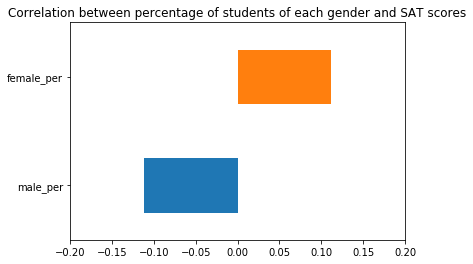

In [41]:
gender_corr.plot(kind = 'barh', xlim = (-0.2, 0.2), title = 'Correlation between percentage of students of each gender and SAT scores')

There is a positive correlation of SAT scores with percentage of female students. A correlation between percentage of male students and SAT scores is negative. These correlations have the absolute value of 0.11.

Next, we will explore the correlation between proportion of female students and exam scores in depth.

In [1]:
combined.plot('female_per', 'sat_score', kind = 'scatter', title = 'Percentage of female students vs SAT scores')

NameError: name 'combined' is not defined

There is a very weak pattern of positive correlation between the variables.

There are some schools with nearly 100% of female students, but their average SAT scores are compatible with those of other schools.

There are several schools with more than 60% of female students which have high SAT scores. We will focus on these instances and investigate them further.

In [43]:
# Selecting schools with high percentage of female students and high SAT scores

high_female = combined.loc[combined['female_per'] > 60, :]
high_female = high_female.loc[high_female['sat_score'] > 1700, :]
high_female

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,...,Location 1,Community Board,Council District,Census Tract,BIN,BBL,NTA,lat,lon,school_dist
5,01M696,BARD HIGH SCHOOL EARLY COLLEGE,130,624.0,604.0,628.0,1856.0,0,129.028846,197.038462,...,"525 East Houston Street\nNew York, NY 10002\n(...",3.0,2.0,1002.0,1004062.0,1.003250e+09,Lower East Side ...,40.718962,-73.976066,01
26,02M416,ELEANOR ROOSEVELT HIGH SCHOOL,127,572.0,594.0,592.0,1758.0,Eleanor Roosevelt High School,155.000000,235.000000,...,"411 East 76 Street\nNew York, NY 10021\n(40.77...",8.0,5.0,132.0,1045949.0,1.014710e+09,Lenox Hill-Roosevelt Island ...,40.770116,-73.953379,02
60,03M479,BEACON HIGH SCHOOL,261,577.0,575.0,592.0,1744.0,BEACON SCHOOL,166.000000,197.000000,...,"227 243 West 61St Street\nNew York, NY 10023\n...",7.0,6.0,151.0,1030328.0,1.011540e+09,Lincoln Square ...,40.772158,-73.987797,03
61,03M485,FIORELLO H. LAGUARDIA HIGH SCHOOL OF MUSIC & A...,531,566.0,564.0,577.0,1707.0,FIORELLO H.LAGUARDIA HS,691.000000,1236.000000,...,"100 Amsterdam Avenue\nNew York, NY 10023\n(40....",7.0,6.0,151.0,1030341.0,1.011560e+09,Lincoln Square ...,40.773671,-73.985269,03
302,25Q525,TOWNSEND HARRIS HIGH SCHOOL,278,621.0,651.0,638.0,1910.0,TOWNSEND HARRIS HS,613.000000,796.000000,...,"149 11 Melbourne Avenue\nFlushing, NY 11367\n(...",8.0,24.0,809.0,4538714.0,4.065070e+09,Kew Gardens Hills ...,40.734408,-73.821417,25


All of these schools are schools with advanced curriculum compared to ordinary high schools. It means that more females than males were granted admission to these schools based on their academic performance.

## Correlation between SAT scores and the proportion of AP test takers

We will create a new column which will indicate the percentage of AP test takers from the total number of students at school.

This will help us to investigate the relationship between the percentage of AP test takers among those who took SAT and the SAT scores themselves.

In [44]:
combined['ap_per'] = combined['AP Test Takers '] / combined['total_enrollment']
combined['ap_per'].head()

0    0.305756
1    0.098985
2    0.031773
3    0.351577
4    0.158091
Name: ap_per, dtype: float64

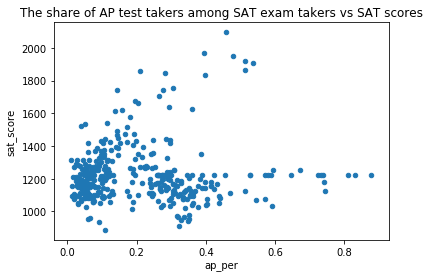

In [45]:
combined.plot('ap_per', 'sat_score', kind = 'scatter', title = 'The share of AP test takers among SAT exam takers vs SAT scores')

There is a very weak pattern of positive correlation. There are schools with high share of AP test takers and high average SAT scores. However, there are also schools with higher percentage of those who took at least one AP, but their SAT scores are compatable with those of other schools.

In [46]:
sat_class_size = combined[['AVERAGE CLASS SIZE', 'sat_score']].corr()
sat_class_size

,AVERAGE CLASS SIZE,sat_score
AVERAGE CLASS SIZE,1.000000,0.381014
sat_score,0.381014,1.000000


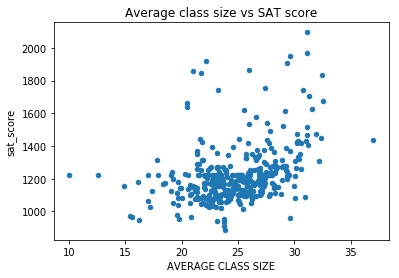

In [47]:
combined.plot('AVERAGE CLASS SIZE', 'sat_score', kind = 'scatter', title = 'Average class size vs SAT score')

Surprisingly, there is a positive correlation between SAT score and average class size. It would be understandable if it would be the other way round - the less students there are in the class, the more teacher can focus on each student individually. Nevertheless, the data presents the opposite picture.

To be fair, the correlation does not seem to be very strong. There is a number of outliers that have high SAT scores, but it happens for schools with class size 20 to 35 (which is almost all schools in the dataset).

However, we can see from the scatter plot that there is a group of schools with class size more than 25 that have slightly higher SAT scores than most of schools do. There is a significantly lower number of schools with less than 25 students on average that achieve such SAT scores.

Overall, there is a positive correlation between the variables, but it is not very strong.

In [48]:
combined[survey_fields].head(10)

,rr_s,rr_t,rr_p,N_s,N_t,N_p,saf_p_11,com_p_11,eng_p_11,aca_p_11,...,aca_t_11,saf_s_11,com_s_11,eng_s_11,aca_s_11,saf_tot_11,com_tot_11,eng_tot_11,aca_tot_11,sat_score
0,89.0,70,39,379.000000,26.0,151.0,7.8,7.7,7.4,7.6,...,6.5,6.000000,5.600000,6.100000,6.700000,6.7,6.2,6.6,7.0,1122.0
1,84.0,95,10,385.000000,37.0,46.0,7.9,7.4,7.2,7.3,...,7.3,6.000000,5.700000,6.300000,7.000000,6.8,6.3,6.7,7.2,1172.0
2,0.0,98,28,598.208333,42.0,150.0,8.7,8.2,8.1,8.4,...,8.8,6.611667,6.094722,6.620278,7.381389,7.9,7.9,7.9,8.4,1149.0
3,90.0,100,21,306.000000,29.0,69.0,7.7,7.4,7.2,7.3,...,6.8,6.400000,5.900000,6.400000,7.000000,6.9,6.2,6.6,7.0,1207.0
4,98.0,68,51,923.000000,67.0,736.0,8.5,7.9,7.9,8.4,...,7.3,7.300000,6.400000,7.000000,7.700000,7.8,6.7,6.9,7.8,1621.0
5,98.0,81,50,561.000000,30.0,283.0,8.8,8.2,8.3,9.1,...,8.3,8.300000,7.300000,8.000000,8.900000,8.5,7.6,8.0,8.7,1856.0
6,72.0,76,30,109.000000,16.0,43.0,8.9,7.7,7.9,8.1,...,7.2,7.300000,6.300000,7.000000,7.500000,8.1,6.7,7.5,7.6,1182.0
7,86.0,100,57,348.000000,35.0,229.0,7.6,7.0,6.9,7.6,...,7.7,6.200000,5.700000,6.100000,7.200000,7.0,6.6,6.9,7.5,1194.0
8,48.0,56,9,150.000000,15.0,28.0,8.7,8.1,7.9,8.3,...,8.9,7.400000,6.500000,7.300000,7.600000,7.9,7.3,7.7,8.2,1156.0
9,61.0,96,56,233.000000,27.0,204.0,8.0,7.3,7.1,7.5,...,8.9,7.100000,6.500000,7.000000,7.400000,7.9,7.3,7.6,8.0,1111.0


## Parent, Teacher and Student Responses to Surveys

Next, we will investigate the differences between parent, teacher and student responses to surveys. We will look at the following questions:

- Safety and respect score
- Communication score
- Engagement score
- Academic expectations

First, we will build a function that takes in the survey question and returns the mean answer of students, teachers and parents.

In [49]:
# Construct the function

def find_means_for_each_survey(question):
    dict_means = {}
    letters = ['s', 'p', 't']
    for l in letters:
        val = combined['{0}_{1}_11'.format(question, l)].mean()
        if l == 's':
            word = 'Students'
        elif l == 'p':
            word = 'Parents'
        elif l == 't':
            word = 'Teachers'
        dict_means[word] = val
        ser = pd.Series(dict_means)
    return ser

In [50]:
# Find mean safety score

safety = find_means_for_each_survey('saf')
safety

Students    6.611667
Parents     8.182920
Teachers    7.144353
dtype: float64

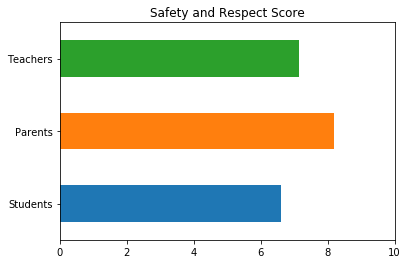

In [51]:
safety.plot(kind = 'barh', title = 'Safety and Respect Score', xlim = (0, 10))

In [52]:
# Find mean communication score

comm = find_means_for_each_survey('com')
comm

Students    6.094722
Parents     7.619559
Teachers    6.528375
dtype: float64

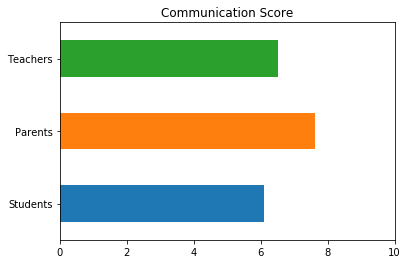

In [53]:
comm.plot(kind = 'barh', title = 'Communication Score', xlim = (0, 10))

In [54]:
# Find mean engagement score

eng = find_means_for_each_survey('eng')
eng

Students    6.620278
Parents     7.517906
Teachers    6.990634
dtype: float64

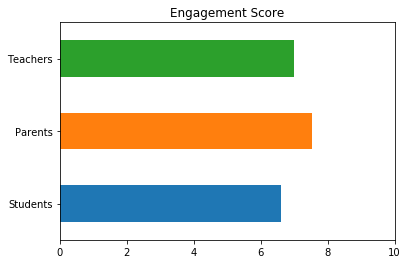

In [55]:
eng.plot(kind = 'barh', title = 'Engagement Score', xlim = (0, 10))

In [56]:
# Find mean academic expectations score

academic = find_means_for_each_survey('aca')
academic

Students    7.381389
Parents     7.806336
Teachers    7.513499
dtype: float64

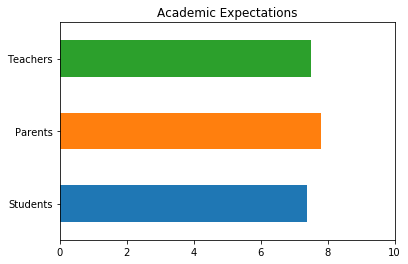

In [57]:
academic.plot(kind = 'barh', title = 'Academic Expectations Score', xlim = (0, 10))

As we can see from the graphs, it is parents who give the highest score, teachers who give the second highest score, and students who give the lowest score for every one of these 4 questions.

## Assigning Scores to Schools

In this section, we will assign scores to schools based on several factors:

- Average SAT score
- Safety score by students
- Academic expectations score by parents

In [61]:
# Find the school with the highest SAT score

sat_score_scores = combined.sort_values('sat_score', 0, False)
sat_score_scores.head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,...,Community Board,Council District,Census Tract,BIN,BBL,NTA,lat,lon,school_dist,ap_per
37,02M475,STUYVESANT HIGH SCHOOL,832,679.0,735.0,682.0,2096.0,STUYVESANT HS,1510.0,2819.0,...,1.0,1.0,31703.0,1084587.0,1.000160e+09,Battery Park City-Lower Manhattan ...,40.717746,-74.014049,02,0.457992
151,10X445,BRONX HIGH SCHOOL OF SCIENCE,731,632.0,688.0,649.0,1969.0,BRONX HS OF SCIENCE,1190.0,2435.0,...,7.0,11.0,409.0,2094706.0,2.032510e+09,Van Cortlandt Village ...,40.877056,-73.889780,10,0.394955
356,31R605,STATEN ISLAND TECHNICAL HIGH SCHOOL,227,635.0,682.0,636.0,1953.0,STATEN ISLAND TECHNICAL HS,528.0,905.0,...,2.0,50.0,134.0,5107621.0,5.042440e+09,New Dorp-Midland Beach ...,40.567913,-74.115362,31,0.478261
155,10X696,HIGH SCHOOL OF AMERICAN STUDIES AT LEHMAN COLLEGE,92,636.0,648.0,636.0,1920.0,HIGH SCHOOL OF AMERICAN STUDIES At Lehman College,194.0,302.0,...,8.0,11.0,409.0,2015222.0,2.032460e+09,Van Cortlandt Village ...,40.871255,-73.897516,10,0.514589
302,25Q525,TOWNSEND HARRIS HIGH SCHOOL,278,621.0,651.0,638.0,1910.0,TOWNSEND HARRIS HS,613.0,796.0,...,8.0,24.0,809.0,4538714.0,4.065070e+09,Kew Gardens Hills ...,40.734408,-73.821417,25,0.537719


In [59]:
# Find the school where students feel most safe

safety_student_scores = combined.sort_values('saf_s_11', 0, False)
safety_student_scores.head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,...,Community Board,Council District,Census Tract,BIN,BBL,NTA,lat,lon,school_dist,ap_per
361,32K554,ALL CITY LEADERSHIP SECONDARY SCHOOL,39,428.0,465.0,422.0,1315.0,All City Leadership Secondary School,7.000000,8.000000,...,4.0,37.0,433.0,3413715.0,3.033440e+09,Bushwick North ...,40.697408,-73.913153,32,0.026616
305,26Q430,FRANCIS LEWIS HIGH SCHOOL,934,468.0,539.0,467.0,1474.0,FRANCIS LEWIS HS,697.000000,1033.000000,...,11.0,20.0,1417.0,4148763.0,4.068820e+09,Auburndale ...,40.740556,-73.792848,26,0.167871
175,12X278,PEACE AND DIVERSITY ACADEMY,34,390.0,401.0,364.0,1155.0,Peace and Diversity Academy,8.000000,8.000000,...,2.0,17.0,131.0,2005276.0,2.026920e+09,Longwood ...,40.825226,-73.893950,12,0.034632
173,12X267,BRONX LATIN,36,408.0,432.0,411.0,1251.0,Bronx Latin,129.028846,197.038462,...,3.0,16.0,131.0,2004868.0,2.026710e+09,Longwood ...,40.827764,-73.900387,12,0.308681
5,01M696,BARD HIGH SCHOOL EARLY COLLEGE,130,624.0,604.0,628.0,1856.0,0,129.028846,197.038462,...,3.0,2.0,1002.0,1004062.0,1.003250e+09,Lower East Side ...,40.718962,-73.976066,01,0.209123


In [62]:
# Find the school which parents have highest academic expectations of

aca_parents_scores = combined.sort_values('aca_p_11', 0, False)
aca_parents_scores.head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,...,Community Board,Council District,Census Tract,BIN,BBL,NTA,lat,lon,school_dist,ap_per
186,13K419,"SCIENCE SKILLS CENTER HIGH SCHOOL FOR SCIENCE,...",92,399.0,417.0,395.0,1211.0,SCIENCE SKILLS CENTER,52.000000,59.000000,...,2.0,33.0,15.0,3000216.0,3.001200e+09,DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hi...,40.697175,-73.984960,13,0.100580
180,12X682,FANNIE LOU HAMER FREEDOM HIGH SCHOOL,72,342.0,346.0,341.0,1029.0,FANNIE LOU HAMER FREEDOM HS,129.028846,197.038462,...,3.0,17.0,157.0,2010945.0,2.030130e+09,Crotona Park East ...,40.830807,-73.886021,12,0.270501
153,10X546,BRONX THEATRE HIGH SCHOOL,68,348.0,362.0,354.0,1064.0,Bronx Theatre High School,34.000000,34.000000,...,8.0,10.0,309.0,1064532.0,1.022150e+09,Marble Hill-Inwood ...,40.877049,-73.912337,10,0.076404
205,14K561,WILLIAMSBURG PREPARATORY SCHOOL,113,397.0,410.0,380.0,1187.0,Williamsburg Preparatory School,31.000000,41.000000,...,1.0,33.0,519.0,3062135.0,3.023300e+09,North Side-South Side ...,40.715038,-73.954650,14,0.053726
5,01M696,BARD HIGH SCHOOL EARLY COLLEGE,130,624.0,604.0,628.0,1856.0,0,129.028846,197.038462,...,3.0,2.0,1002.0,1004062.0,1.003250e+09,Lower East Side ...,40.718962,-73.976066,01,0.209123


Surprisingly, schools with highest academic expectations score by parents have SAT scores which are quite average.

## Conclusion

In this project, we have investigated the relationship between SAT scores and numerous factors. We have cleaned several datasets, put all necessary data into one dataset and conducted the analysis. These are the results of our analysis:

- There is a very weak pattern of schools with higher safety rate having higher SAT scores
- Manhattan schools have the highest safety rate in NYC, while Brooklyn schools seem to be the least safe in the city
- Black and hispanic students tend to do worse on SAT tests compared to white and asian test takers
- Females tend to better on SAT tests than males
- Barely any correlation between SAT scores and the proportion of AP test takers
- To questions like safety and respect score, communication score, engagement score and academic expectations, it is parents who give the highest score, teachers who give the second highest score, and students who give the lowest score
- Schools with highest academic expectations score by parents have SAT scores which are quite average

Based on the results we have got, we can propose that SAT tests might be considered controversial in terms of being unfair to some racial groups. 